In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../LP-1 Dataset/Decision Tree & Naive Bayes Classification/madfhantr.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer = SimpleImputer(strategy='mean')

for col in ('LoanAmount','Loan_Amount_Term','Credit_History'):
    df[col] = imputer.fit_transform(df[[col]])

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

for col in ('Gender', 'Married', 'Dependents', 'Self_Employed'):
    df[col] = imputer.fit_transform(df[[col]]).ravel()

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

for col in ('Gender', 'Married', 'Dependents', 'Self_Employed','Education'):
    df[col] = labels.fit_transform(df[[col]])


df.drop(['Loan_ID'], axis=1, errors='ignore')
x = df.iloc[:,:11]
x

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.p

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0


In [9]:
y = df['Loan_Status']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [12]:
trees = DecisionTreeClassifier()

In [13]:
x_train = x_train.iloc[:,1:]

In [14]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
16,1,0,1,1,0,3596,0.0,100.000000,240.0,0.842199
389,1,1,0,0,0,5488,0.0,125.000000,360.0,1.000000
499,1,0,0,0,0,6283,4416.0,209.000000,360.0,0.000000
63,1,1,1,0,0,4945,0.0,146.412162,360.0,0.000000
257,1,1,3,0,0,5250,0.0,94.000000,360.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
40,1,0,0,0,0,3600,0.0,80.000000,360.0,1.000000
532,1,0,2,0,0,3588,0.0,110.000000,360.0,0.000000
489,1,0,0,0,0,2435,0.0,75.000000,360.0,1.000000
14,1,1,2,0,0,1299,1086.0,17.000000,120.0,1.000000


In [15]:
trees.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
x_test = x_test.iloc[:,1:]

In [17]:
trees.predict(x_test)

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y'],
      dtype=object)

In [18]:
accuracy_score(y_test, trees.predict(x_test))

0.7597402597402597

In [19]:
x_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,1.000000,0.357073,0.152580,0.027147,-0.055729,0.045626,0.061930,0.094069,-0.086655,0.058455
Married,0.357073,1.000000,0.343716,0.027797,-0.002918,0.043571,0.065825,0.161635,-0.082461,-0.001639
Dependents,0.152580,0.343716,1.000000,0.031399,0.027936,0.147593,0.047283,0.170191,-0.128751,-0.017395
Education,0.027147,0.027797,0.031399,1.000000,-0.038131,-0.131852,-0.056985,-0.176887,-0.098576,-0.070963
Self_Employed,-0.055729,-0.002918,0.027936,-0.038131,1.000000,0.154781,-0.066419,0.096504,-0.056152,0.044565
ApplicantIncome,0.045626,0.043571,0.147593,-0.131852,0.154781,1.000000,-0.115705,0.524109,0.002937,-0.003300
CoapplicantIncome,0.061930,0.065825,0.047283,-0.056985,-0.066419,-0.115705,1.000000,0.181504,-0.093038,-0.001640
LoanAmount,0.094069,0.161635,0.170191,-0.176887,0.096504,0.524109,0.181504,1.000000,0.051699,0.014772
Loan_Amount_Term,-0.086655,-0.082461,-0.128751,-0.098576,-0.056152,0.002937,-0.093038,0.051699,1.000000,-0.036248
Credit_History,0.058455,-0.001639,-0.017395,-0.070963,0.044565,-0.003300,-0.001640,0.014772,-0.036248,1.000000


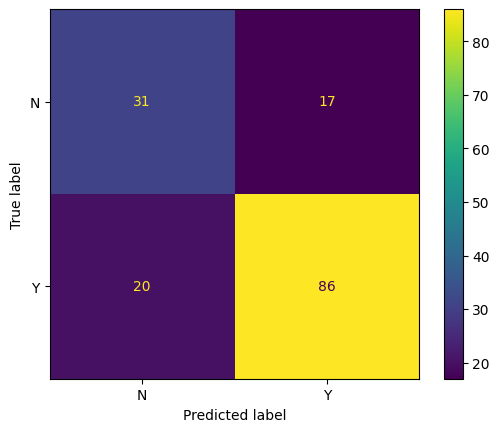

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, trees.predict(x_test))

In [21]:
confusion_matrix(y_test, trees.predict(x_test))

array([[31, 17],
       [20, 86]], dtype=int64)

[Text(0.42857142857142855, 0.9166666666666666, 'x[9] <= 0.421\ngini = 0.43\nsamples = 460\nvalue = [144, 316]'),
 Text(0.19047619047619047, 0.75, 'x[6] <= 8115.0\ngini = 0.06\nsamples = 65\nvalue = [63, 2]'),
 Text(0.30952380952380953, 0.8333333333333333, 'True  '),
 Text(0.09523809523809523, 0.5833333333333334, 'x[7] <= 165.5\ngini = 0.031\nsamples = 63\nvalue = [62, 1]'),
 Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[7] <= 172.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.23809523809523808, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 

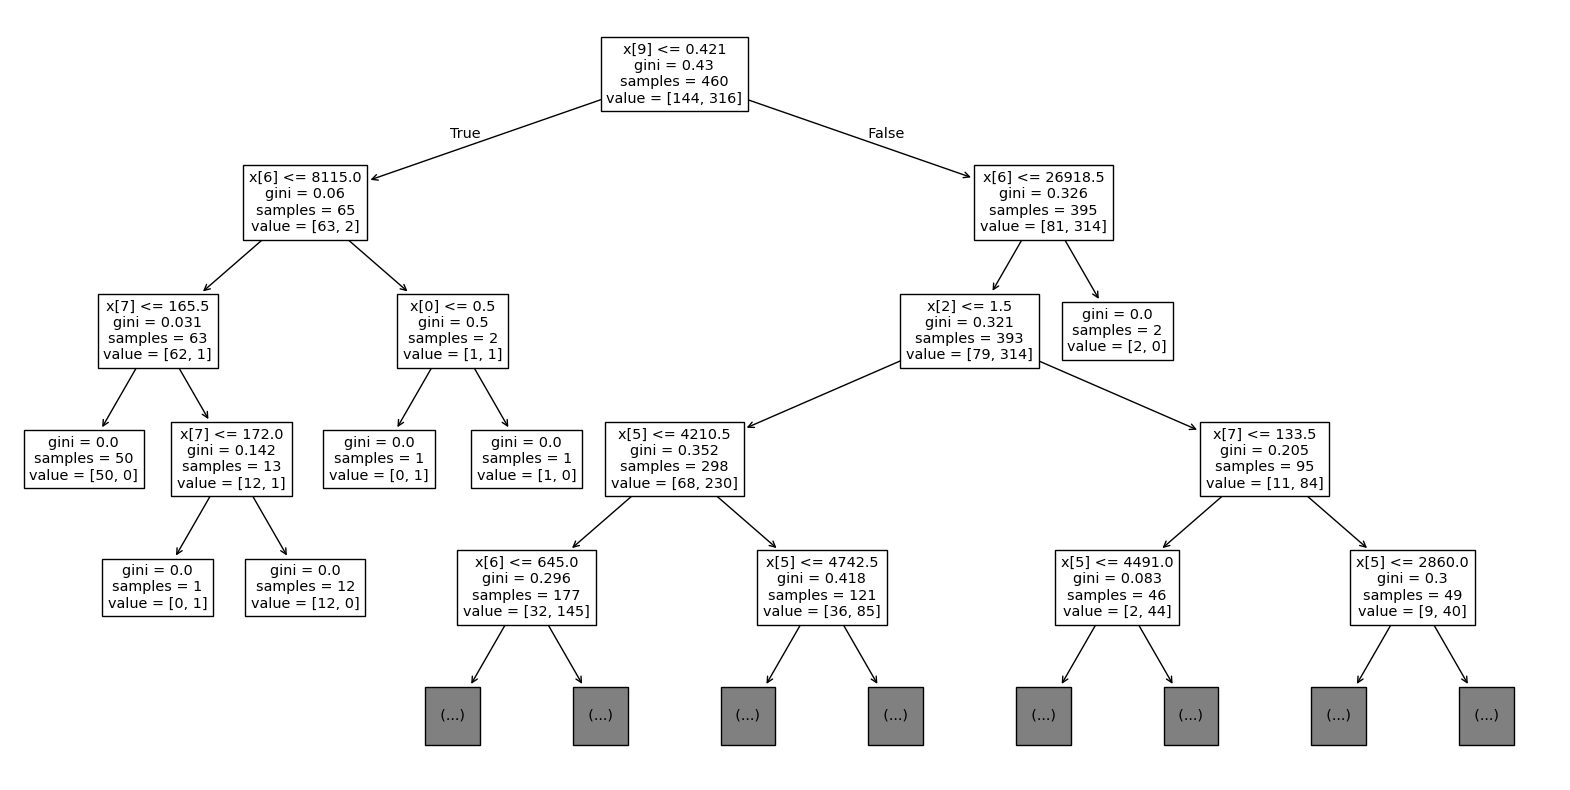

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(trees,max_depth=4)